# Identifying Top Films Using Box Office Data

## Introduction
Video content is one of the most watched forms of entertainment today. As our company prepares to create a new movie studio, it is important to understand what kinds of films perform best. The insights derived from this exploratory data analysis will be translated into actionable recommendations for the new movie studio.

## Business Understanding
This project analyzes Box Office Data to uncover patterns in film performance. The goal is to support the company's entry into the film market by answering key business questions, such as:

 - What genres dominate the box office?

 - What revenue trends exist over time?

 - Which films and actors attract the highest audiences?

The insights will help the  head of our company’s new movie studio  to make informed decisions about what kinds of films to produce.

## Data Understanding
The data used in this project comes from several popular film industry sources, including:

  - `Box Office Mojo`
  - `IMDb` 
  - `Rotten Tomatoes`
  - `TheMovieDB` 
  - `The Numbers`

These datasets are stored in the `Data` folder. Since the files were collected from different sources, they vary in structure and formatting, hence I will be using pandas and SQLite3 to explore and combine relevant datasets.

## 1. Data Exploration
With the project clearly explained, i will now load and explore the datasets to be used for this analysis.

#### 1.1 Importing relevant libraries 

In [1]:
# Import relevant libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1.2 Load the Sqlite dataset and query to get the relevant tables

In [2]:
# Establish a connection to database

conn = sqlite3.connect('Data/im.db')

# Display the tables From the database using pandas

pd.read_sql("""SELECT  *
            FROM sqlite_master ;
            """, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Query and preview the tables that are relevant that is `movie_basics` and `movie_ratings`.

In [3]:
# Query the movie_basic table
pd.read_sql("""SELECT * 
               FROM movie_basics
               LIMIT 10;
             """, conn)



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [4]:
# Query the movie_ratings table
pd.read_sql("""SELECT * 
                FROM movie_ratings
                LIMIT 10;
            """, conn)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


Merge the two tables using the unique identifier `movie_id` present in both tables and call the new dataframe **`df_movies`**.

In [5]:
# Merge the two tables using Sql
df_movies = pd.read_sql("""SELECT *
               FROM movie_basics 
               JOIN movie_ratings 
               USING(movie_id);
            """, conn)

df_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


With the merged dataframe we can inspect the dataframe to check the structure, check null values and duplicates


In [6]:
# Check the summary of the dataframe
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The summary shows 73856 rows and 8 columns. The dataframe seems to have missing values.

Next we get an overview of the distributions  of the data.

In [7]:
# Get descriptive statistics for numerical columns
print("Descriptive Statistics for numerical columns:")
df_movies.describe()

Descriptive Statistics for numerical columns:


,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [8]:
# Check for missing values
print("Missing values per column:")
print(df_movies.isnull().sum())


Missing values per column:
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64


Two columns runtime_minutes and genres have missing values which we will clean during the cleaning step.

In [9]:
# Close DB connection
conn.close()

#### 1.2 Load the CSV dataset and explore

In [10]:
# Load the CSV file using pandas
df = pd.read_csv("Data/bom.movie_gross.csv.gz")

# Display the dataframe
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


We now inspect our dataframe to understand its structure by checking the summary, missing values and duplicates.

In [11]:
# Preview the  dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The dataframe has 3387 rows and 5 columns. The dataframe clearly has missing values.

In [12]:
# Check for missing values
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Three columns have missing values to be addressed during the cleaning part.

In [13]:
# Check for duplicates
df.duplicated().sum()

0

## 2. Data Cleaning

This step is crucial as it enables cleaning of data by standardizing formats, handling missing values and handling outliers.Since there is two DataFrames, i will clean each one separately before merging them to a single Dataframe.

### 2.1 Cleaning the merged SQL tables DataFrame

In [14]:
# Create a copy of the df_movies to work on it
df_movie_copy = df_movies.copy()

# Display the summary
df_movie_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


##### 2.1.1 Handling Missing Values
Missing data can cause bias hence the need to accurately ensure the data has no NaNs.

In [15]:
# Check for missing values in each column
df_movie_copy.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

The two columns `runtime_minutes` and `genres` have missing values which will be handled now. I will begin with the `runtime_minutes` column.

In [16]:
# Check the value_counts for the column
df_movie_copy['runtime_minutes'].value_counts()

90.0     4742
80.0     2166
85.0     2057
100.0    1957
95.0     1933
         ... 
212.0       1
278.0       1
225.0       1
467.0       1
746.0       1
Name: runtime_minutes, Length: 289, dtype: int64

Since majority of the films have a runtime of between 90 and 100 it is likely that i fill missing values with the median.

In [17]:
# Calculate the median 
median_runtime = df_movie_copy['runtime_minutes'].median()

# Fill with the median
df_movie_copy['runtime_minutes'].fillna(median_runtime, inplace=True)

# Check to see if there are still NaN values
df_movie_copy['runtime_minutes'].isnull().sum()


0

Next is the `genres` column.

In [18]:
# Check the value_counts 
df_movies['genres'].value_counts()

Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Documentary,Family,Sci-Fi        1
Action,Crime,Western             1
Crime,Music,Mystery              1
Comedy,History,Mystery           1
Animation,Western                1
Name: genres, Length: 923, dtype: int64

Since  the `genres` column is crucial for the analysis i will fill NaNs with '`Unknown`' to prevent loss of data.

In [19]:
# Fill missing values with Uknown
df_movie_copy['genres'].fillna('Unknown', inplace = True)

# Check is there is missing values
df_movie_copy['genres'].isnull().sum()

0

In [20]:
# Check is there is missing values in the dataframe
df_movie_copy.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

##### 2.1.2 Handling Duplicates

In [21]:
print("Checking and Handling Duplicates")

# A movie should be unique by its movie_id.

print(f"Number of exact duplicate rows: {df_movie_copy.duplicated().sum()}")

# If there are exact duplicates, drop them:
df_movie_copy.drop_duplicates(inplace=True)


Checking and Handling Duplicates
Number of exact duplicate rows: 0


##### 2.1.3 Check for Outliers
This will enabe us to see data points that significantly deviate from other observations.

In [22]:
# Check statistical summary for the numerical columns
df_movie_copy.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,94.277039,6.332729,3.523662e+03
std,2.614807,197.524557,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,101.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


The first column is the `start_year`.

In [23]:
# Check Outliers in start_year
print("Checking 'start_year' outliers:")
print(f"Min year: {df_movie_copy['start_year'].min()}")
print(f"Max year: {df_movie_copy['start_year'].max()}")

Checking 'start_year' outliers:
Min year: 2010
Max year: 2019


No abnormal years recorded. We move to `runtime_minutes` column

count    73856.000000
mean        94.277039
std        197.524557
min          3.000000
25%         83.000000
50%         91.000000
75%        101.000000
max      51420.000000
Name: runtime_minutes, dtype: float64


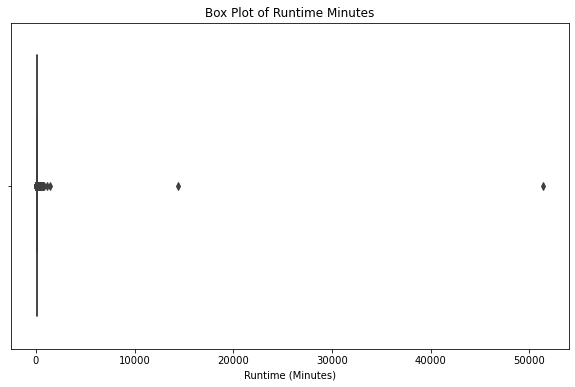

In [24]:
# Outliers in runtime_minutes
print(df_movie_copy['runtime_minutes'].describe())

# Plot a box plot to visualize
plt.figure(figsize = (10, 6))
sns.boxplot(x = df_movie_copy['runtime_minutes'])
plt.title('Box Plot of Runtime Minutes')
plt.xlabel('Runtime (Minutes)')
plt.show()

The maximum runtime looks like an abnormal runtime so i will handle the outliers in this column.

In [25]:
# Remove runtime_minutes above 180 mins 
df_movie_copy = df_movie_copy[df_movie_copy['runtime_minutes'] <= 300]

# Check to see any outlier
df_movie_copy['runtime_minutes'].describe()


count    73813.000000
mean        93.179819
std         21.651537
min          3.000000
25%         83.000000
50%         91.000000
75%        101.000000
max        300.000000
Name: runtime_minutes, dtype: float64

Next is the `averagerating` column

count    73813.000000
mean         6.332096
std          1.474822
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64


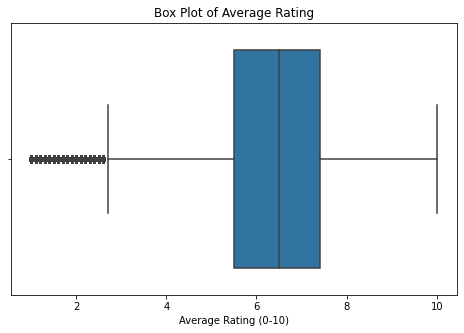

In [26]:
# Outliers in averagerating
print(df_movie_copy['averagerating'].describe())

plt.figure(figsize = (8, 5))
sns.boxplot(x = df_movie_copy['averagerating'])
plt.title('Box Plot of Average Rating')
plt.xlabel('Average Rating (0-10)')
plt.show()

This column is pretty okay and also the `numvotes` column seems to have films that have many votes so i will not handle outliers.

### 2.2 Cleaning the CSV dataset

This is the `bom.movie_gross.csv.gz` located in the Data folder.

In [27]:
# Create a copy of the df 
df_bom =  df.copy()

# Preview the summary
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### 2.2.1 Handling Missing values

3 columns namely `studio`, `domestic_gross`, `foreign_gross` have missing values which need to be dealt with. I will begin with `studio` column.

In [28]:
# Print value_counts for the studio column
print(df_bom['studio'].describe())

count     3382
unique     257
top        IFC
freq       166
Name: studio, dtype: object


In [29]:
# Since it’s a categorical column, i will Fill with "Unknown"
df_bom['studio'].fillna("Unknown", inplace = True)

# Check the Dataframe
df_bom.isnull().sum()


title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Assuming no domestic earnings reported i will fill the `domestic_gross` column with 0.

In [30]:
# Fill NaNa with 0
df_bom['domestic_gross'].fillna(0, inplace = True)

# Check the Dataframe
df_bom.isnull().sum()


title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

`foreign_gross` column has a lot of missing values. Best to fill with 0, to avoid overestimating earnings.

In [31]:
df_bom['foreign_gross'].fillna(0, inplace = True)

# Check the Dataframe
df_bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

##### 2.2.2 Handling Duplicates

In [32]:
print("Checking and Handling Duplicates")

# Check duplicates

print(f"Number of exact duplicate rows: {df_bom.duplicated().sum()}")

# If there are exact duplicates, drop them:
print(df_bom.drop_duplicates(inplace = True))


Checking and Handling Duplicates
Number of exact duplicate rows: 0
None


##### 2.2.3 Checking Outliers

In [33]:
# Check statistical summary
df_bom.describe()

,domestic_gross,year
count,3.387000e+03,3387.000000
mean,2.850821e+07,2013.958075
std,6.675575e+07,2.478141
min,0.000000e+00,2010.000000
25%,1.115000e+05,2012.000000
50%,1.300000e+06,2014.000000
75%,2.750000e+07,2016.000000
max,9.367000e+08,2018.000000


In [34]:
# Convert foreign_gross to numeric
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'], errors='coerce')

# Also convert domestic_gross just to be safe
df_bom['domestic_gross'] = pd.to_numeric(df_bom['domestic_gross'], errors='coerce')


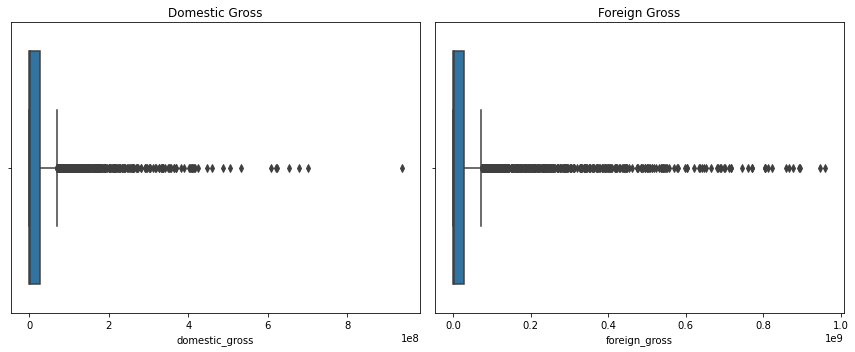

In [35]:
# Plot boxplots  
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x = df_bom['domestic_gross'])
plt.title('Domestic Gross')

plt.subplot(1, 2, 2)
sns.boxplot(x = df_bom['foreign_gross'])
plt.title('Foreign Gross')

plt.tight_layout()
plt.show()

While some extreme values exist in the gross data, these are retained as they represent major box office successes crucial to our business insights.

## 2.3 Feature Engineering

The `df_movies` DataFrame extracted from the database

In [36]:
# Create a new column to show age of a movie
df_movie_copy['movie_age'] = 2025 - df_movie_copy['start_year']


In [37]:
# Bin runtime_minutes
# Define bins and labels
runtime_bins = [0, 90, 120, df_movie_copy['runtime_minutes'].max()]
runtime_labels = ['Short', 'Medium', 'Long']

# Apply binning
df_movie_copy['runtime_category'] = pd.cut(df_movie_copy['runtime_minutes'], bins=runtime_bins, labels=runtime_labels, include_lowest=True)

In [38]:
# bin average ratings
# Define bins and labels
bins = [0, 6, 8, 10]
labels = ['Low', 'Medium', 'High']

# Apply binning
df_movie_copy['rating_category'] = pd.cut(df_movie_copy['averagerating'], bins = bins, labels = labels, include_lowest = True)

# Check df summary
df_movie_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73813 entries, 0 to 73855
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   movie_id          73813 non-null  object  
 1   primary_title     73813 non-null  object  
 2   original_title    73813 non-null  object  
 3   start_year        73813 non-null  int64   
 4   runtime_minutes   73813 non-null  float64 
 5   genres            73813 non-null  object  
 6   averagerating     73813 non-null  float64 
 7   numvotes          73813 non-null  int64   
 8   movie_age         73813 non-null  int64   
 9   runtime_category  73813 non-null  category
 10  rating_category   73813 non-null  category
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 5.8+ MB


The `bom_movies` CSV 

In [39]:
# Create total_gross column
df_bom['total_gross'] = df_bom['domestic_gross'].fillna(0) + df_bom['foreign_gross'].fillna(0)

# check summary
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3387 non-null   int64  
 5   total_gross     3387 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.2+ KB


## 3. Exploratory Data Analysis
In this section, we perform Exploratory Data Analysis (EDA) to understand the structure, patterns, and relationships within our datasets.

### 3.1 Univariate Analysis
We start with univariate analysis to look at each column on its own and understand the basic patterns in the data.

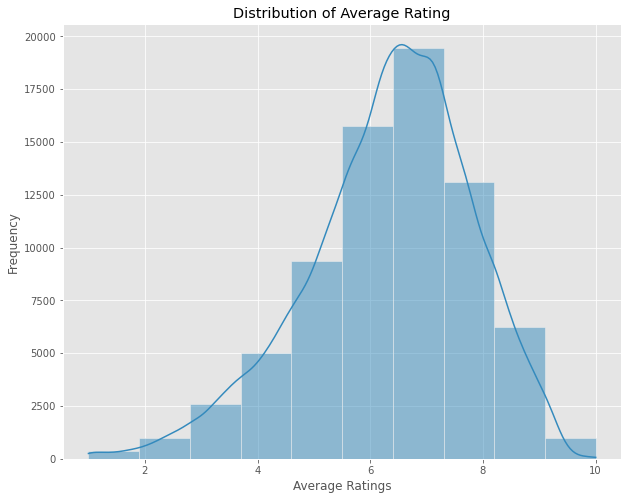

In [40]:
# Plot to see the Distributio of average ratings of genres in our df_movie_copy DataFrame
plt.figure(figsize = (10, 8))

plt.style.use('ggplot')

sns.histplot(df_movie_copy['averagerating'], bins = 10, kde = True) # Histogram with 10 bins
plt.title('Distribution of Average Rating')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.show()

Most ratings are concentrated in the 5.5 – 8.0 range. The tail on the left includes some movies with very low ratings  below 5.

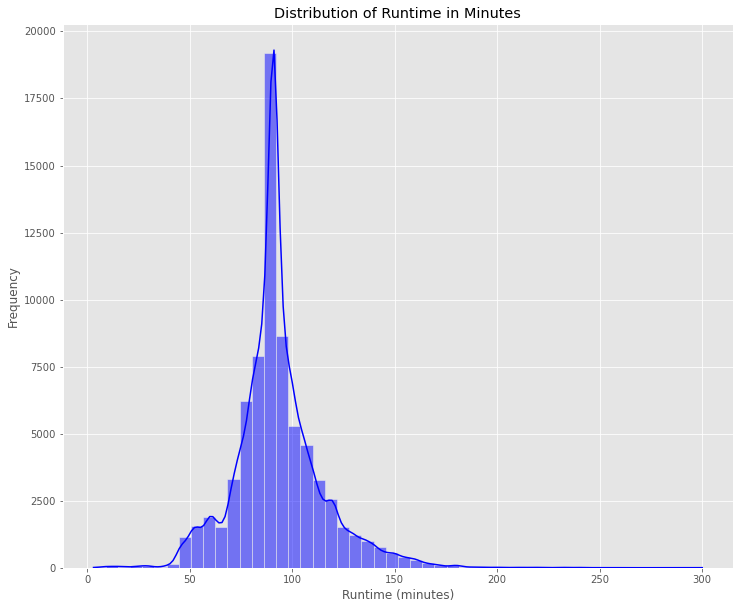

In [41]:
# Plot to see the average movie minutes mostly watched
plt.figure(figsize = (12, 10))

sns.histplot(df_movie_copy['runtime_minutes'], bins = 50,color = 'blue', kde = True)
plt.title("Distribution of Runtime in Minutes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.show()


Most watched movies have a runtime minutes of between 80 to 120 minutes.

For the genres, I exploded the `genres` column since a movie can belong to multiple genres hence need to analyze each genre separately. This helped to get clearer insights on genre trends, frequency, and performance.

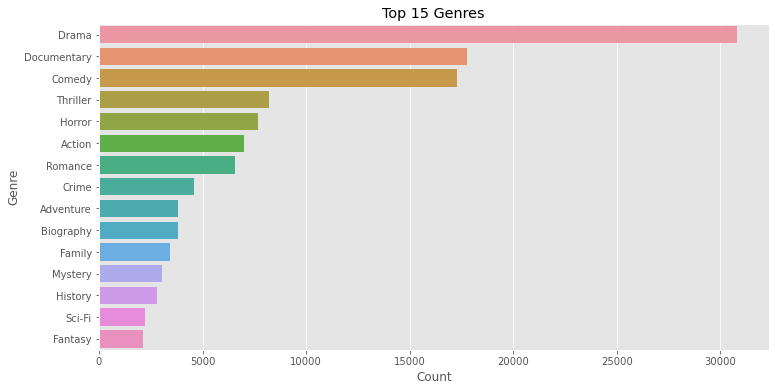

In [42]:
# Exploding genres columns
df_exploded = df_movies.copy() # Makes a copy the dataframe
df_exploded['genres'] = df_exploded['genres'].str.split(',') # splits the comma separated genres into lists 

df_exploded = df_exploded.explode('genres') ## Explode the list so each genre gets its own row

plt.figure(figsize = (12, 6))
sns.countplot(data = df_exploded, y = 'genres', order = df_exploded['genres'].value_counts().index[:15])
plt.title("Top 15 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


Drama is the most popular, then Documentaries and Comedy follow in the top 3 with over 15000. Fantasy and Sci-Fi have less than 5000 counts.

Next is to see the top studios 

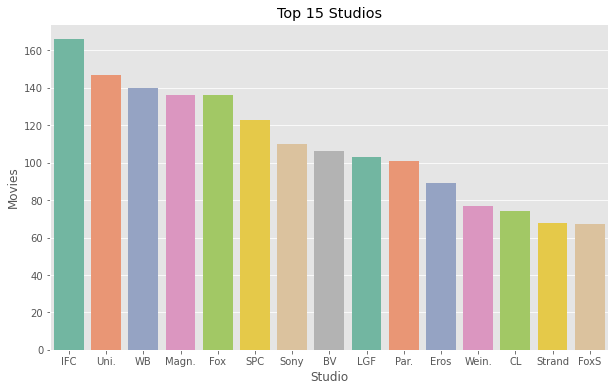

In [43]:

# Get top 10 studios by count
top_studios = df_bom['studio'].value_counts().head(15).index

# Filter the dataset to only include those top studios
filtered_bom = df_bom[df_bom['studio'].isin(top_studios)]

plt.figure(figsize = (10,6))
sns.countplot(data = filtered_bom, x = 'studio', order = top_studios, palette = 'Set2')
plt.title("Top 15 Studios")
plt.xlabel("Studio")
plt.ylabel("Movies")

plt.show()


IFC(Independent Film Company), Universal(uni), Warner Bros(WB) are in the top 3 best performing studios.

### 3.2 Bivariate Analysis

Here, I will explore how two variables interact to uncover patterns that inform box office performance.

We begin by asking Which genres have been the most produced over the years?

      start_year                genres  count
213         2010                Comedy    525
232         2010          Comedy,Drama    232
240         2010  Comedy,Drama,Romance    128
271         2010        Comedy,Romance    119
303         2010           Documentary    910
...          ...                   ...    ...
4547        2019                 Drama    392
4575        2019         Drama,Romance     37
4597        2019                Horror     75
4603        2019       Horror,Thriller     38
4616        2019              Thriller     77

[100 rows x 3 columns]


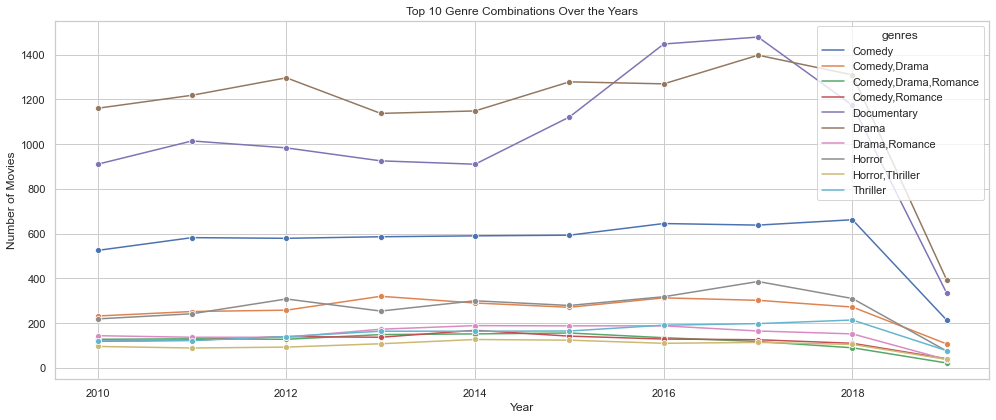

In [67]:
# Group by year and full genre string, count how many movies for each combination
total_counts = df_movie_copy.groupby(['start_year', 'genres']).size().reset_index(name = 'count')

# Get top 10 most common full genre combinations (e.g., 'Action,Adventure,Sci-Fi')
top_genres = (
    total_counts.groupby('genres')['count']
    .sum()
    .nlargest(10)
    .index
)

# Filter for only the top genre combinations
filtered = total_counts[total_counts['genres'].isin(top_genres)]

# Print the grouped data (optional)
print(filtered)


plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered, x='start_year', y='count', hue='genres', marker='o')
plt.title('Top 10 Genre Combinations Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


Documentary and comedy genres have been performing well over the years.

Next is Which movie genres consistently receive the highest average ratings?

In [75]:
# Drop missing values for genres and rating
df_clean = df_movie_copy.dropna(subset=['genres', 'averagerating'])

# Explode genres: turn comma-separated strings into individual rows
df_clean['genres'] = df_clean['genres'].str.split(',')  # Split string into list
df_exploded = df_clean.explode('genres')                # Turn each list item into a row

# Remove any extra spaces
df_exploded['genres'] = df_exploded['genres'].str.strip()

# Group by individual genre and compute average rating
genre_ratings = df_exploded.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Plot top 10 genres
top10 = genre_ratings.head(20)
print(top10)



genres
Short          8.800000
Documentary    7.331812
Game-Show      7.300000
News           7.271330
Biography      7.161813
Music          7.090081
History        7.040312
Sport          6.961493
War            6.584291
Reality-TV     6.500000
Unknown        6.496144
Musical        6.495556
Drama          6.401150
Family         6.394725
Animation      6.248308
Adventure      6.195780
Romance        6.146608
Crime          6.114385
Comedy         6.002401
Mystery        5.920401
Name: averagerating, dtype: float64


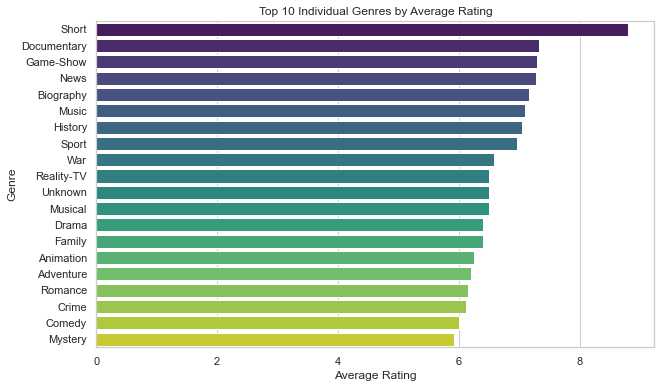

In [76]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('Top 10 Individual Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

Short genres has the highest rating. Documentaries, Game-show, News are also in the top ratings.

We now look at how runtime in minutes relates to average ratings.

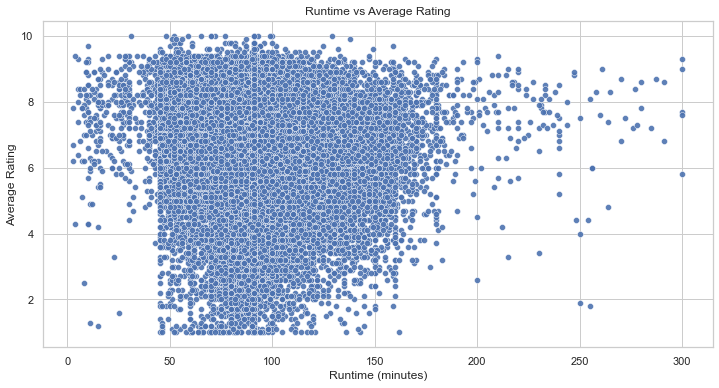

In [46]:
# Runtime vs Average Rating
plt.figure(figsize = (12, 6))

sns.set(style = "whitegrid")

sns.scatterplot(data = df_movie_copy, x = 'runtime_minutes', y = 'averagerating', alpha = 0.9)
plt.title("Runtime vs Average Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")

plt.show()


There's a dense cluster of movies with runtimes between roughly 80–120 minutes, where most ratings lie between 5 and 8.

We now answer Which are the top 10 studios based on total gross revenue?

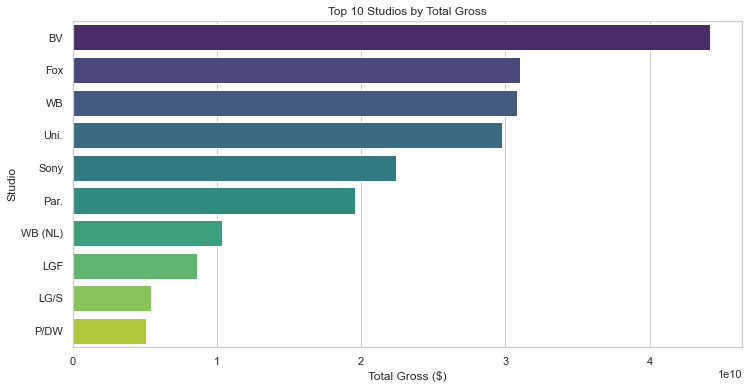

In [47]:
# Top 10 Studios by Total Gross Revenue
top_total = df_bom.groupby('studio')['total_gross'].sum().sort_values(ascending = False).head(10) # group by studio and total gross

plt.figure(figsize = (12, 6))
sns.barplot(x = top_total.values, y = top_total.index, palette = 'viridis')
plt.title('Top 10 Studios by Total Gross')
plt.xlabel('Total Gross ($)')
plt.ylabel('Studio')

plt.show()


BV, Fox and WB studios top in terms of total revenue.

Is there a correlation between domestic and foreign gross revenue?

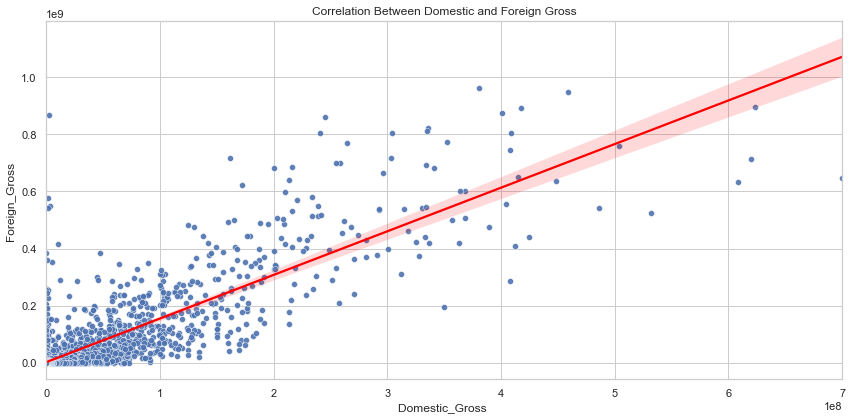

Correlation coefficient: 0.85


In [48]:
# plot the relationship between domestic gross and foreign gross
plt.figure(figsize = (12, 6))

sns.scatterplot(data = df_bom, x = 'domestic_gross', y = 'foreign_gross', alpha = 0.9)
sns.regplot(data = df_bom, x = 'domestic_gross', y = 'foreign_gross', scatter = False, color = 'red')
plt.title("Correlation Between Domestic and Foreign Gross")
plt.xlabel("Domestic_Gross ")
plt.ylabel("Foreign_Gross ")
plt.tight_layout()
plt.show()

correlation = df_bom[['domestic_gross', 'foreign_gross']].corr().iloc[0,1]
print(f"Correlation coefficient: {correlation:.2f}")

There is a strong positive correlation of 0.79 between domestic and foreign gross revenues, suggesting that movies that perform well in domestic markets tend to also perform well internationally.

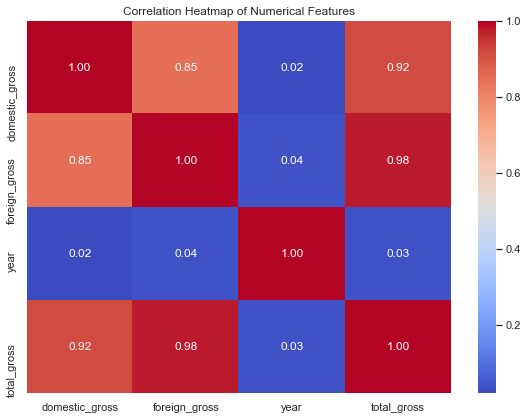

In [49]:
numeric_df = df_bom.select_dtypes(include = 'number')
plt.figure(figsize = (8, 6))
sns.heatmap(df_bom.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


In [ ]:
#df_movie_copy.to_csv('Data/cleaned_movies.csv', index=False)  # if you have a 'data/' folder
